In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [518]:
data=pd.read_excel("C:\\Users\\Sachin Patil\\Desktop\\FingerTip's Project Data\\ML Live Flight Fare_Project.xlsx")

In [519]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [520]:
data["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [521]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [522]:
data.drop("Additional_Info",axis=1,inplace=True)

In [523]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662


In [524]:
data.drop("Route",axis=1,inplace=True)

In [525]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [526]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10683 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 751.3+ KB


In [527]:
data.shape

(10683, 9)

In [528]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [529]:
data[data["Total_Stops"].isnull()==True]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,7480


In [530]:
data.dropna(inplace=True)

In [531]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [532]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Dep_Time         10682 non-null  object
 5   Arrival_Time     10682 non-null  object
 6   Duration         10682 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Price            10682 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 834.5+ KB


In [533]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [534]:
data["Date_of_Journey"]=pd.to_datetime(data["Date_of_Journey"])

In [535]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662


In [536]:
data["Journey_Month"]=data["Date_of_Journey"].dt.month
data["Journey_Day"]=data["Date_of_Journey"].dt.day
data["Journey_Year"]=data["Date_of_Journey"].dt.year

In [537]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,2019
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,2019


In [538]:
data.drop("Date_of_Journey",axis=1,inplace=True)

In [539]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Journey_Year
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,2019
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,2019


In [540]:
data["Journey_Year"].unique()

array([2019])

In [541]:
data.drop("Journey_Year",axis=1,inplace=True)

In [542]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1


In [543]:
data["Dep_Minute"]=pd.to_datetime(data["Dep_Time"]).dt.minute
data["Dep_Hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour

In [544]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,3,24,20,22
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,5,1,50,5


In [545]:
data.drop("Dep_Time",axis=1,inplace=True)

In [546]:
data.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,20,22
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,50,5


In [547]:
data["Arrival_Hour"]=pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_Minute"]=pd.to_datetime(data["Arrival_Time"]).dt.minute

In [548]:
data.head(2)

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,3,24,20,22,1,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,5,1,50,5,13,15


In [549]:
data.drop("Arrival_Time",axis=1,inplace=True)

In [550]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,20,22,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,50,5,13,15


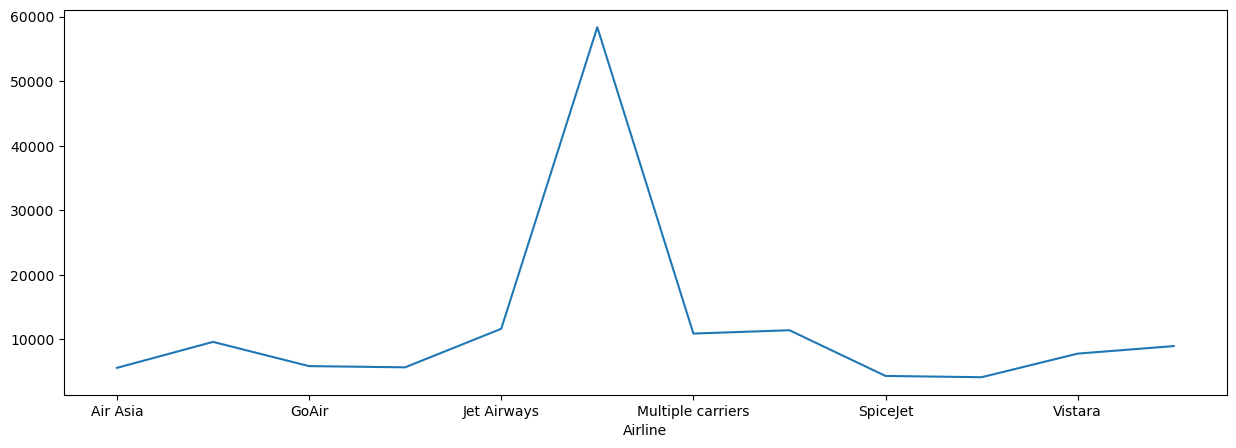

In [551]:
data.groupby("Airline")["Price"].mean().plot(figsize=(15,5))
plt.show()

In [552]:
airline=pd.get_dummies(data["Airline"])

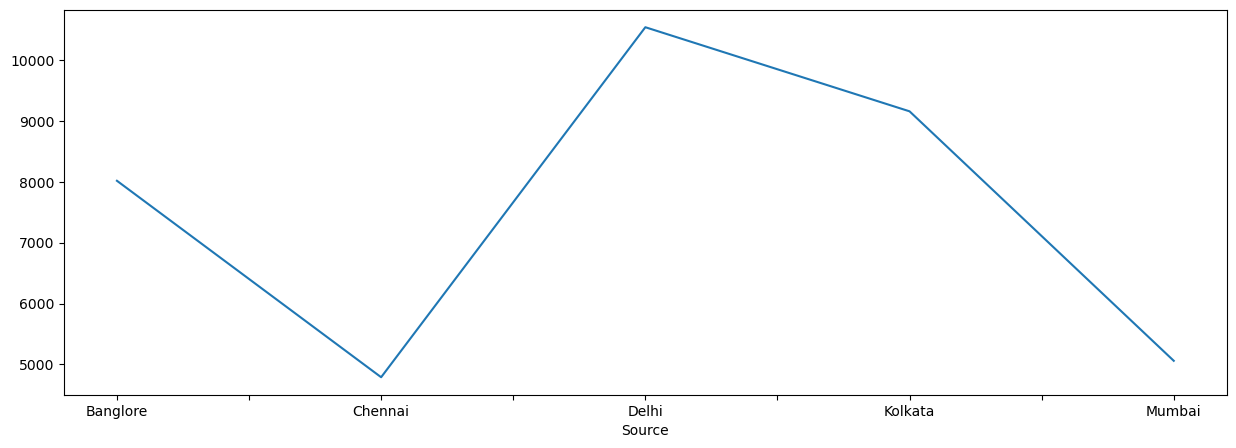

In [553]:
data.groupby("Source")["Price"].mean().plot(figsize=(15,5))
plt.show()

In [554]:
source=pd.get_dummies(data["Source"])

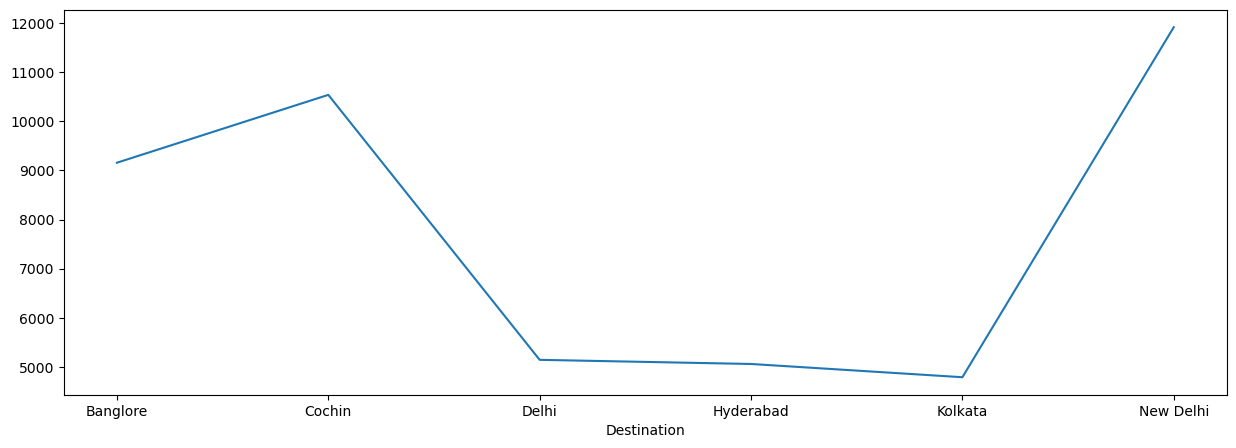

In [555]:
data.groupby("Destination")["Price"].mean().plot(figsize=(15,5))
plt.show()

In [556]:
destination=pd.get_dummies(data["Destination"])

In [557]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,20,22,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,50,5,13,15


In [558]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [559]:
data["Total_Stops"]=data["Total_Stops"].replace(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],[0,2,1,3,4])

In [560]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,3,24,20,22,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,5,1,50,5,13,15


In [561]:
data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [562]:
data.head(2)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute
0,2h 50m,0,3897,3,24,20,22,1,10
1,7h 25m,2,7662,5,1,50,5,13,15


In [563]:
data=pd.concat([data,airline,source,destination],axis=1 )

In [564]:
data.head(2)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


In [565]:
pd.set_option("display.max_columns",None)

In [566]:
data.head(2)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False


In [567]:
data["Duration_Hour"]=data["Duration"].str.split().str[0]
data["Duration_Minutes"]=data["Duration"].str.split().str[1]

In [568]:
data.head(2)

,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minutes
0,2h 50m,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2h,50m
1,7h 25m,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7h,25m


In [569]:
data.drop("Duration",axis=1,inplace=True)

In [570]:
data.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minutes
0,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2h,50m
1,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7h,25m
2,2,13882,6,9,25,9,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19h,NaN
3,1,6218,5,12,5,18,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5h,25m
4,1,13302,3,1,50,16,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4h,45m


In [571]:
data.fillna(0,inplace=True)

In [572]:
data.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minutes
0,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2h,50m
1,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7h,25m
2,2,13882,6,9,25,9,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19h,0
3,1,6218,5,12,5,18,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5h,25m
4,1,13302,3,1,50,16,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4h,45m


In [573]:
data["Duration_Hour"]=data["Duration_Hour"].replace("[hm]"," ",regex=True)
data["Duration_Minutes"]=data["Duration_Minutes"].replace("[hm]"," ",regex=True)

In [574]:
 data.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minutes
0,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2,50
1,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7,25
2,2,13882,6,9,25,9,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,19,0
3,1,6218,5,12,5,18,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,5,25
4,1,13302,3,1,50,16,21,35,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,4,45


In [575]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Total_Stops                        10682 non-null  int64 
 1   Price                              10682 non-null  int64 
 2   Journey_Month                      10682 non-null  int32 
 3   Journey_Day                        10682 non-null  int32 
 4   Dep_Minute                         10682 non-null  int32 
 5   Dep_Hour                           10682 non-null  int32 
 6   Arrival_Hour                       10682 non-null  int32 
 7   Arrival_Minute                     10682 non-null  int32 
 8   Air Asia                           10682 non-null  bool  
 9   Air India                          10682 non-null  bool  
 10  GoAir                              10682 non-null  bool  
 11  IndiGo                             10682 non-null  bool  
 12  Jet Airwa

In [576]:
data[["Duration_Hour","Duration_Minutes"]]=data[["Duration_Hour","Duration_Minutes"]].astype("int")

In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   Journey_Month                      10682 non-null  int32
 3   Journey_Day                        10682 non-null  int32
 4   Dep_Minute                         10682 non-null  int32
 5   Dep_Hour                           10682 non-null  int32
 6   Arrival_Hour                       10682 non-null  int32
 7   Arrival_Minute                     10682 non-null  int32
 8   Air Asia                           10682 non-null  bool 
 9   Air India                          10682 non-null  bool 
 10  GoAir                              10682 non-null  bool 
 11  IndiGo                             10682 non-null  bool 
 12  Jet Airways            

In [578]:
data.head(2)

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Minute,Dep_Hour,Arrival_Hour,Arrival_Minute,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Banglore,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Duration_Hour,Duration_Minutes
0,0,3897,3,24,20,22,1,10,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,2,50
1,2,7662,5,1,50,5,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,7,25


In [592]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [593]:
from sklearn.model_selection import train_test_split

In [594]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=200)

In [595]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [654]:
model=LinearRegression()

In [655]:
model.fit(x_train,y_train)

LinearRegression()

In [656]:
model.score(x_train,y_train)*100


63.15272889934742

In [657]:
model.score(x_test,y_test)*100

59.05652280376239

In [701]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [702]:
all_model=[DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,KNeighborsRegressor,SVR]
for i in all_model:
    model=i()
    model=model.fit(x_train,y_train)
    print(i,'accurcy',model.score(x_test,y_test)*100)

<class 'sklearn.tree._classes.DecisionTreeRegressor'> accurcy 70.52718938765243
<class 'sklearn.ensemble._forest.RandomForestRegressor'> accurcy 82.33812780199416
<class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'> accurcy 8.91051769424548
<class 'sklearn.neighbors._regression.KNeighborsRegressor'> accurcy 54.48699293018673
<class 'sklearn.svm._classes.SVR'> accurcy 1.111959241498539


In [703]:
from sklearn.ensemble import RandomForestRegressor
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [704]:
y_predicted=model1.predict(x_test)

In [705]:
model1.score(x_train,y_train)*100

95.3384858806604

In [706]:
model1.score(x_test,y_test)*100

81.980866814422

In [707]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [708]:
mean_absolute_error(y_test,y_predicted)

1154.625156178208

In [709]:
mean_squared_error(y_test,y_predicted)

3877086.8625278263

In [710]:
r2_score(y_test,y_predicted)*100

81.980866814422